# Analyzing Results

After separating each patient into a DB, we can finally analyze the results. This analysis is done by

1. Analyzing the number of patients in each DB
2. Analyzing the breakdown of DBGarbage, specifically the reason for each patient ending up there

We also breakdown the number of deceased patients in each DB, along with the total number of exams.

Number of patients in DBClean: 384
Number of patients in DBCompleted: 3910
Number of patients in DBGarbage: 5073

Breakdown of DBGarbage:
No row with all exams completed        2846
Does not meet minimum criteria         1451
Not sequential (exceeds two months)     468
Uncompletable monthly exam              228
Uncompletable quarterly exam             41
Uncompletable annual exam                25
Uncompletable semiannual exam            14


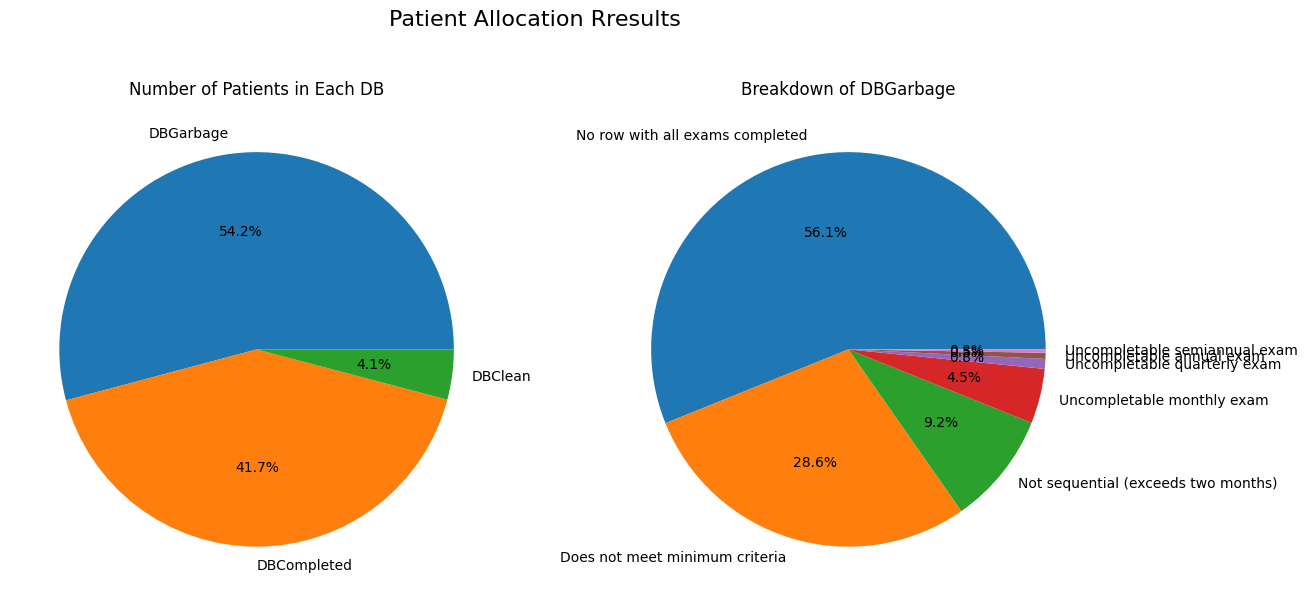

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

patients = pd.read_excel('out/patients.xlsx')

print(f'Number of patients in DBClean: {len(patients[patients["Destino"] == "DBClean"])}')
print(f'Number of patients in DBCompleted: {len(patients[patients["Destino"] == "DBCompleted"])}')
print(f'Number of patients in DBGarbage: {len(patients[patients["Destino"] == "DBGarbage"])}')

patients_broken_rules_counts = patients['Regra quebrada'].value_counts()
patients_broken_rules_counts = patients_broken_rules_counts[patients_broken_rules_counts.index != 'Nothing']

print()
print('Breakdown of DBGarbage:')
print(patients_broken_rules_counts.to_string(header=False))

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle('Patient Allocation Rresults', fontsize=16)

db_counts = patients['Destino'].value_counts()
axs[0].pie(db_counts, labels=db_counts.index, autopct='%1.1f%%')
axs[0].set_title('Number of Patients in Each DB')

broken_rules_counts = patients['Regra quebrada'].value_counts()
broken_rules_counts = broken_rules_counts[broken_rules_counts.index != 'Nothing']
axs[1].pie(broken_rules_counts, labels=broken_rules_counts.index, autopct='%1.1f%%')
axs[1].set_title('Breakdown of DBGarbage')

plt.show()



After analyzing patient allocation, we can also analyze the number of alive and deceased patients in each DB, along with the number of exams.

In [5]:
db_raw = pd.read_excel('DBRaw.xlsx')
db_clean = pd.read_excel('out/DBClean.xlsx')
db_completed = pd.read_excel('out/DBCompleted.xlsx')

In [6]:
datasets = {'DBRaw': db_raw, 'DBClean': db_clean, 'DBCompleted': db_completed}


for dataset_name, dataset in datasets.items():
    unique_patients = len(dataset.drop_duplicates(subset='Código'))

    num_patients_deceased = dataset[dataset['Desfecho'] == 'Óbito'].shape[0]
    num_patients_alive = unique_patients - num_patients_deceased
    
    num_exams_deceased = dataset[dataset['Código'].isin(dataset[dataset['Desfecho'] == 'Óbito']['Código'])].shape[0]
    num_exams_alive = dataset[~dataset['Código'].isin(dataset[dataset['Desfecho'] == 'Óbito']['Código'])].shape[0]

    print(f'{dataset_name}\n')
    print(f'Total patients: {unique_patients}')
    print(f'Total exams: {dataset.shape[0]}\n')

    print(f"Alive patients: {num_patients_alive}")
    print(f"Alive patient exams: {num_exams_alive}")
    print()
    print(f"Deceased patients: {num_patients_deceased}")
    print(f"Deceased patient exams: {num_exams_deceased}")
    print("------------------------------------------------------")

DBRaw

Total patients: 9367
Total exams: 214956

Alive patietns: 8450
Alive patient exams: 198084

Deceased patients: 917
Deceased patient exams: 16872
------------------------------------------------------
DBClean

Total patients: 384
Total exams: 4587

Alive patietns: 365
Alive patient exams: 4399

Deceased patients: 19
Deceased patient exams: 188
------------------------------------------------------
DBCompleted

Total patients: 4067
Total exams: 71229

Alive patietns: 3818
Alive patient exams: 68164

Deceased patients: 249
Deceased patient exams: 3065
------------------------------------------------------
